<a href="https://colab.research.google.com/github/Yash-Narnaware/PG-Lab/blob/main/Yash_PG_Lab_assignment_4b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing the required libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout, Activation
import matplotlib.pyplot as plt

###Load he dataset and add padding

In [ ]:
# Load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2)), mode='constant')
x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2)), mode='constant')

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 32, 32)
(10000, 32, 32)


###Define the model architecture and train the model

In [ ]:
model = Sequential()

# Layer 1
model.add(Conv2D(6, (5, 5), strides=1, padding='valid', input_shape=(32, 32, 1)))
model.add(Activation('tanh'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2))

# Layer 2
model.add(Conv2D(16, (5, 5), strides=1, padding='valid'))
model.add(Activation('tanh'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(120))
model.add(Activation('tanh'))
model.add(Dense(84))
model.add(Activation('tanh'))

# Output layer
model.add(Dense(10))
model.add(Activation('softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 28, 28, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 10, 10, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_5                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Scaling the data so that it ranges between 0 to 1
x_train = np.expand_dims(x_train, -1).astype('float32') / 255
x_test = np.expand_dims(x_test, -1).astype('float32') / 255

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 40ms/step - accuracy: 0.9898 - loss: 0.0346 - val_accuracy: 0.9756 - val_loss: 0.0801
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - accuracy: 0.9916 - loss: 0.0298 - val_accuracy: 0.9774 - val_loss: 0.0788
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.9924 - loss: 0.0264 - val_accuracy: 0.9769 - val_loss: 0.0763
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 42ms/step - accuracy: 0.9928 - loss: 0.0243 - val_accuracy: 0.9759 - val_loss: 0.0786
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 38ms/step - accuracy: 0.9933 - loss: 0.0235 - val_accuracy: 0.9768 - val_loss: 0.0796
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 42ms/step - accuracy: 0.9939 - loss: 0.0217 - val_accuracy: 0.9754 - val_loss: 0.0805
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 39ms/step - accuracy: 0.9941 - loss: 0.0206 - val_accuracy: 0.9773 - val_loss: 0.0804
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.9951 - loss: 0.0163 - 

###Plotting model accuracy and loss on training and validation data

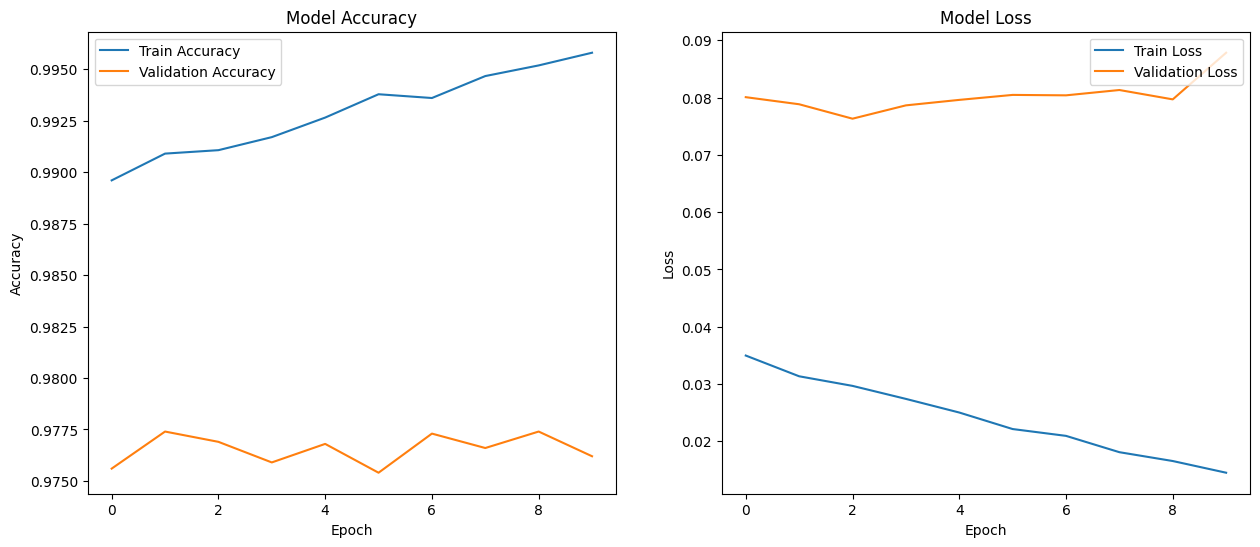

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(15, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show the plots
plt.show()

###Model evaluation

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9729 - loss: 0.1001
Test Loss: 0.0878344401717186
Test Accuracy: 0.9761999845504761


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


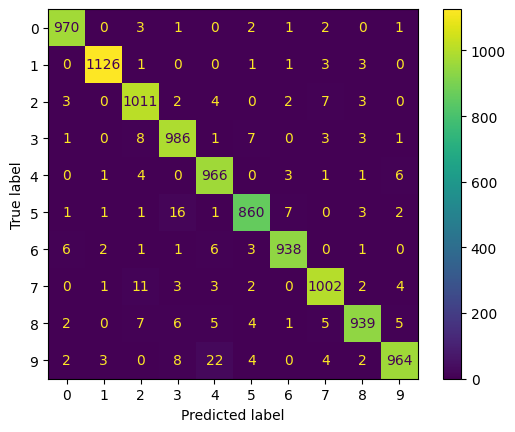

In [ ]:
#plotting the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(x_test)
predictions = predictions.argmax(axis=1)
y_true = y_test

cm = confusion_matrix(y_true, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()